In [113]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.armax_model import ARMAXModel
from seminartools.data import read_merged

# 1. Read data

In [168]:
df_inflation = read_inflation()
df_exog = read_merged()
df_exog.reset_index(inplace = True)
df_exog.rename(columns = {"country" : "Country", "date" : "yearmonth"}, inplace=True)
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


# 2. AR model per country

In [169]:
modelARMA = ARMAXModel()
exogenous_vars = ["gdp_growth", "interest_rate", "unemployment_rate", "commodity_CRUDE_PETRO", "commodity_iNATGAS", "commodity_iAGRICULTURE", "commodity_iMETMIN", "commodity_iPRECIOUSMET"]
modelARMAX = ARMAXModel(exogenous_columns = exogenous_vars)

In [170]:
import numpy as np
countries = (df_exog["Country"].unique())
mask = np.logical_not(np.isin(countries,["France", "Germany", "Netherlands", "Belgium"]))
countries = countries[mask]
countries

array(['Japan', 'Canada', 'United States', 'Australia', 'New Zealand',
       'Switzerland', 'Italy', 'Portugal', 'Spain', 'Sweden', 'Denmark',
       'United Kingdom', 'Norway', 'Korea', 'South Africa', 'Türkiye'],
      dtype=object)

In [171]:
df_inflation
df_exog


,Country,yearmonth,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
1524,Switzerland,2023-01-01,0.010084,0.309543,1.166667,4.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
1525,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
1526,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
1527,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [179]:
from warnings import filterwarnings

select = df_exog.Country.apply(lambda x : x in countries)
dfExogtoUse = df_exog[select].copy()

filterwarnings('ignore')
modelARMA.fit(df_inflation)
modelARMAX.fit(dfExogtoUse)

In [173]:
for country, order in modelARMA.orders.items():
    print(f"Order for {country}: {order}")

Order for Portugal: (2, 1)
Order for New Zealand: (1, 3)
Order for Dominican Republic: (3, 2)
Order for Finland: (3, 3)
Order for Ireland: (3, 3)
Order for Austria: (2, 2)
Order for Japan: (3, 3)
Order for South Africa: (3, 3)
Order for Korea, Rep.: (2, 3)
Order for Fiji: (3, 3)
Order for Paraguay: (1, 1)
Order for Malaysia: (2, 2)
Order for Sweden: (1, 1)
Order for Switzerland: (3, 3)
Order for Thailand: (2, 3)
Order for Cyprus: (3, 3)
Order for Mauritius: (2, 3)
Order for Greece: (2, 3)
Order for France: (2, 2)
Order for Denmark: (2, 3)
Order for Netherlands: (3, 3)
Order for Turkey: (2, 3)
Order for Singapore: (2, 1)
Order for Germany: (3, 3)
Order for Luxembourg: (2, 3)
Order for Guatemala: (1, 3)
Order for Norway: (1, 1)
Order for Belgium: (3, 2)
Order for United States: (1, 3)
Order for Canada: (3, 3)
Order for Italy: (1, 1)
Order for United Kingdom: (2, 3)
Order for Australia: (1, 1)
Order for Spain: (2, 2)
Order for Philippines: (3, 3)


In [174]:
for country, order in modelARMAX.orders.items():
    print(f"Order for {country}: {order}")

Order for Japan: (2, 2)
Order for Canada: (3, 3)
Order for United States: (3, 2)
Order for Australia: (1, 3)
Order for New Zealand: (1, 1)
Order for Switzerland: (2, 0)
Order for Italy: (0, 1)
Order for Portugal: (0, 1)
Order for Spain: (0, 1)
Order for Sweden: (2, 3)
Order for Denmark: (1, 2)
Order for United Kingdom: (2, 1)
Order for Norway: (1, 0)
Order for Korea: (2, 0)
Order for South Africa: (0, 1)
Order for Türkiye: (0, 1)


In [180]:
modelARMA.models["Switzerland"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                  212
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 789.808
Date:                Tue, 26 Mar 2024   AIC                          -1563.616
Time:                        15:53:24   BIC                          -1536.763
Sample:                    06-30-1970   HQIC                         -1552.762
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0073      0.003      2.241      0.025       0.001       0.014
ar.L1         -0.1287      0.165     -0.782      0.434      -0.451       0.194
ar.L2          0.8883      0.043     20.672      0.000       0.804       0.973
ar.L3          0.1833      0.156      1.171      0.241      -0.123       0.490
ma.L1          0.5426      0.145      3.736      0.000       0.258       0.827
ma.L2         -0.5914      0.088     -6.758      0.000      -0.763      -0.420
ma.L3         -0.4978      0.110     -4.506      0.000      -0.714      -0.281
sigma2       3.35e-05   2.33e-06     14.394      0.000    2.89e-05    3.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               184.16
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [181]:
modelARMAX.models["Switzerland"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                   67
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 269.121
Date:                Tue, 26 Mar 2024   AIC                           -514.242
Time:                        15:53:27   BIC                           -487.785
Sample:                    06-30-1996   HQIC                          -503.773
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0148      0.009      1.726      0.084      -0.002       0.032
gdp_growth                 0.0009      0.001      1.267      0.205      -0.000       0.002
interest_rate              0.0003      0.001      0.241      0.809      -0.002       0.002
unemployment_rate         -0.0030      0.002     -1.527      0.127      -0.007       0.001
commodity_CRUDE_PETRO      0.0115      0.005      2.432      0.015       0.002       0.021
commodity_iNATGAS         -0.0033      0.004     -0.891      0.373      -0.011       0.004
commodity_iAGRICULTURE     0.0086      0.015      0.595      0.552      -0.020       0.037
commodity_iMETMIN         -0.0201      0.010     -2.100      0.036      -0.039      -0.001
commodity_iPRECIOUSMET    -0.0065      0.009     -0.725      0.468      -0.024       0.011
ar.L1                      0.1709      0.138      1.236      0.216      -0.100       0.442
ar.L2                      0.2452      0.176      1.390      0.164      -0.100       0.591
sigma2                  1.895e-05   4.68e-06      4.051      0.000    9.78e-06    2.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 4.24
Prob(Q):                              0.72   Prob(JB):                         0.12
Heteroskedasticity (H):               0.77   Skew:                            -0.61
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 3. Evaluation

In [125]:
df_inflation["Country"].unique()

array(['Portugal', 'New Zealand', 'Dominican Republic', 'Finland',
       'Ireland', 'Austria', 'Japan', 'South Africa', 'Korea, Rep.',
       'Fiji', 'Paraguay', 'Malaysia', 'Sweden', 'Switzerland',
       'Thailand', 'Cyprus', 'Mauritius', 'Greece', 'France', 'Denmark',
       'Netherlands', 'Turkey', 'Singapore', 'Germany', 'Luxembourg',
       'Guatemala', 'Norway', 'Belgium', 'United States', 'Canada',
       'Italy', 'United Kingdom', 'Australia', 'Spain', 'Philippines'],
      dtype=object)

,yearmonth,Country,inflation
0,2023-04-01,Portugal,0.017672
1,2023-04-01,New Zealand,0.013069
2,2023-04-01,Dominican Republic,0.019733
3,2023-04-01,Finland,0.025324
4,2023-04-01,Ireland,0.018154
5,2023-04-01,Austria,0.022065
6,2023-04-01,Japan,0.008785
7,2023-04-01,South Africa,0.017125
8,2023-04-01,"Korea, Rep.",0.008566
9,2023-04-01,Fiji,0.010900


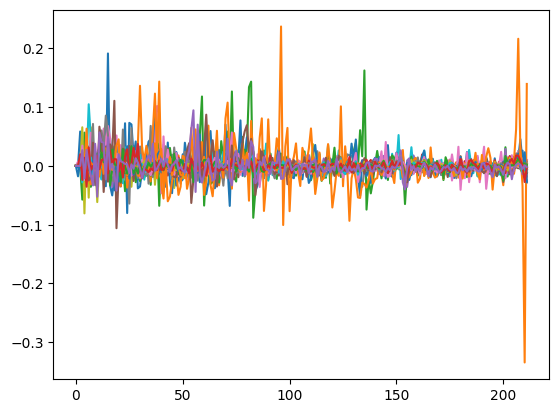

In [177]:
modelARMA.predict(df_inflation)

,yearmonth,Country,inflation
0,2023-04-01,Japan,0.006995
1,2023-04-01,Canada,0.014946
2,2023-04-01,United States,0.019694
3,2023-04-01,Australia,0.013769
4,2023-04-01,New Zealand,0.013529
5,2023-04-01,Switzerland,0.010179
6,1999-01-01,Italy,-0.004008
7,1999-01-01,Portugal,0.026082
8,1999-01-01,Spain,0.001129
9,2023-04-01,Sweden,0.019415


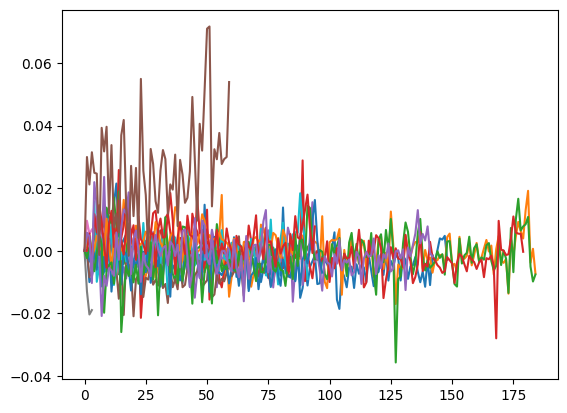

In [187]:
modelARMAX.predict(dfExogtoUse)


# 3.2. Try to make ARMA forecasts

In [188]:
data = df_inflation[df_inflation["Country"] == "Switzerland"]
data

,Country Code,IMF Country Code,Country,yearmonth,inflation
4823,CHE,146,Switzerland,1970-04-01,0.008982
4824,CHE,146,Switzerland,1970-07-01,0.011869
4825,CHE,146,Switzerland,1970-10-01,0.020528
4826,CHE,146,Switzerland,1971-01-01,0.020115
4827,CHE,146,Switzerland,1971-04-01,0.014085
...,...,...,...,...,...
5030,CHE,146,Switzerland,2022-01-01,0.007859
5031,CHE,146,Switzerland,2022-04-01,0.015595
5032,CHE,146,Switzerland,2022-07-01,0.006718
5033,CHE,146,Switzerland,2022-10-01,-0.000791


In [189]:
mdl = modelARMA.models["Switzerland"]
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                  212
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 789.808
Date:                Tue, 26 Mar 2024   AIC                          -1563.616
Time:                        15:58:14   BIC                          -1536.763
Sample:                    06-30-1970   HQIC                         -1552.762
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0073      0.003      2.241      0.025       0.001       0.014
ar.L1         -0.1287      0.165     -0.782      0.434      -0.451       0.194
ar.L2          0.8883      0.043     20.672      0.000       0.804       0.973
ar.L3          0.1833      0.156      1.171      0.241      -0.123       0.490
ma.L1          0.5426      0.145      3.736      0.000       0.258       0.827
ma.L2         -0.5914      0.088     -6.758      0.000      -0.763      -0.420
ma.L3         -0.4978      0.110     -4.506      0.000      -0.714      -0.281
sigma2       3.35e-05   2.33e-06     14.394      0.000    2.89e-05    3.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               184.16
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

0.008972928951377338

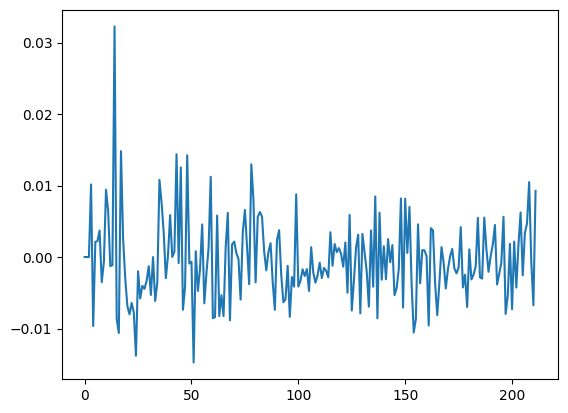

In [190]:
modelARMA._predict_country(data, "Switzerland")

# 4. H-period ahead forecasting

In [130]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


,yearmonth,Country,inflation
0,2020-01-01,Japan,0.006103
1,2020-01-01,Canada,0.006910
2,2020-01-01,United States,0.005971
3,2020-01-01,Australia,0.008905
4,2020-01-01,New Zealand,0.007661
...,...,...,...
203,2021-04-01,United Kingdom,0.001851
204,2023-01-01,Norway,0.009592
205,2023-01-01,Korea,0.001480
206,2023-01-01,South Africa,0.013901


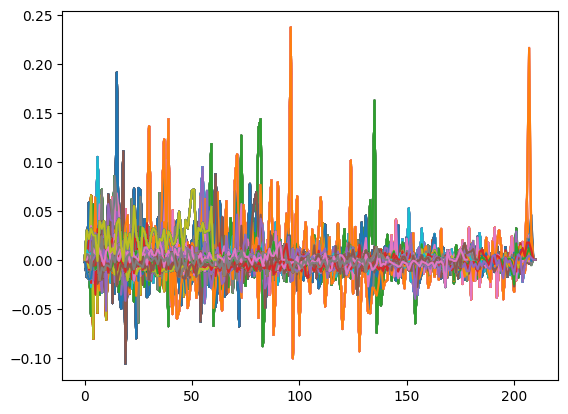

In [230]:
from seminartools.models.utils import h_period_ahead_forecast

forecastARMA = h_period_ahead_forecast(modelARMA, df_inflation, "2020-01-01", h=3)
forecastARMAX = h_period_ahead_forecast(modelARMAX, dfExogtoUse, "2020-01-01", h=3)

forecastARMAX

1999-07-01 00:00:00


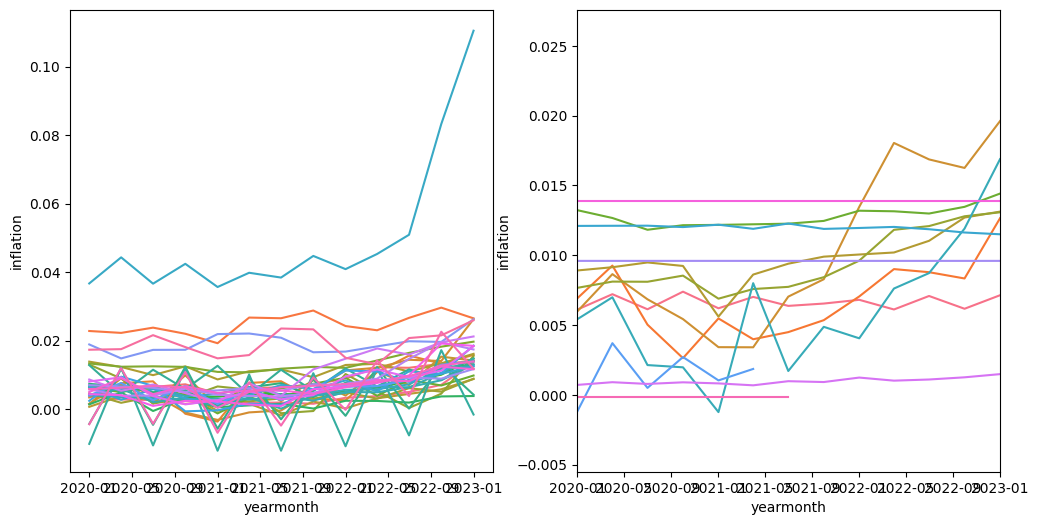

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  
sns.lineplot(
    data = forecastARMA,
    x = "yearmonth",
    y = "inflation",
    hue = "Country",
    ax = axes[0]
)
sns.lineplot(
    data = forecastARMAX,
    x = "yearmonth",
    y = "inflation",
    hue = "Country",
    ax = axes[1]
)
print(forecastARMAX['yearmonth'].min())
axes[1].set_xlim(forecastARMA['yearmonth'].min(), forecastARMAX['yearmonth'].max())
# turn off legend
axes[0].legend().remove()
axes[1].legend().remove()


In [133]:
modelARMAX.models["Switzerland"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                  212
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 790.328
Date:                Tue, 26 Mar 2024   AIC                          -1566.655
Time:                        15:20:02   BIC                          -1543.159
Sample:                    06-30-1970   HQIC                         -1557.159
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.002      3.740      0.000       0.004       0.014
ar.L1         -0.0541      0.246     -0.220      0.826      -0.535       0.427
ar.L2          0.8888      0.054     16.367      0.000       0.782       0.995
ar.L3         -0.0333      0.189     -0.176      0.860      -0.404       0.337
ma.L1          0.4883      0.228      2.140      0.032       0.041       0.936
ma.L2         -0.4535      0.194     -2.341      0.019      -0.833      -0.074
sigma2      3.359e-05   2.22e-06     15.147      0.000    2.92e-05    3.79e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                73.33
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.00
Prob(H) (two-sided):                  0.36   Kurtosis:                         5.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 5. Compare the forecast with the actual data

In [222]:
forecast_mergedARMA = forecastARMA.copy().rename(columns={"inflation": "pred"})
forecast_mergedARMA = forecast_mergedARMA.merge(
    df_inflation[["Country", "yearmonth", "inflation"]],
    on=["Country", "yearmonth"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_mergedARMA.tail(100)

,yearmonth,Country,pred,actual
355,2022-07-01,Austria,0.006991,0.026846
356,2022-07-01,Japan,0.004397,0.010628
357,2022-07-01,South Africa,0.010954,0.027957
358,2022-07-01,"Korea, Rep.",0.006086,0.011352
359,2022-07-01,Fiji,0.000295,0.007368
...,...,...,...,...
450,2023-01-01,Italy,0.018432,0.003938
451,2023-01-01,United Kingdom,0.011607,0.008814
452,2023-01-01,Australia,0.013883,0.013756
453,2023-01-01,Spain,0.011750,0.006013


In [231]:
forecast_mergedARMAX = forecastARMAX.copy().rename(columns={"inflation": "pred"})
forecast_mergedARMAX = forecast_mergedARMAX.merge(
    dfExogtoUse[["Country", "yearmonth", "inflation"]],
    on=["Country", "yearmonth"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_mergedARMAX.tail(100)

,yearmonth,Country,pred,actual
108,2021-07-01,Norway,0.009592,0.014192
109,2021-07-01,Korea,0.000974,0.006862
110,2021-07-01,South Africa,0.013901,0.016055
111,2021-07-01,Türkiye,-0.000139,NaN
112,2021-10-01,Japan,0.006535,0.001969
...,...,...,...,...
203,2021-04-01,United Kingdom,0.001851,NaN
204,2023-01-01,Norway,0.009592,0.006886
205,2023-01-01,Korea,0.001480,0.010538
206,2023-01-01,South Africa,0.013901,0.011202


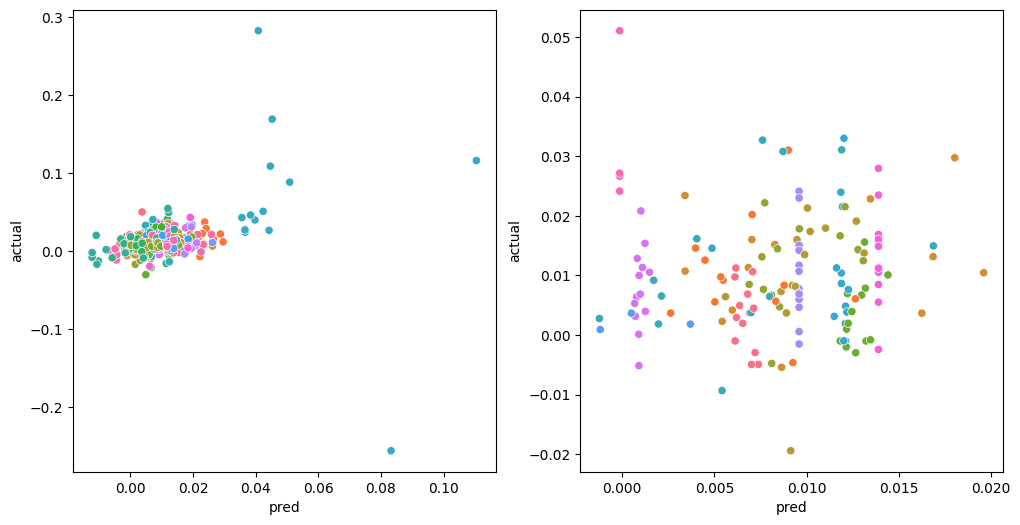

In [241]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  
sns.scatterplot(
    data = forecast_mergedARMA,
    x = "pred",
    y = "actual",
    hue = "Country",
    ax=axes[0],
)
sns.scatterplot(
    data = forecast_mergedARMAX,
    x = "pred",
    y = "actual",
    hue = "Country",
    ax = axes[1],
)
# turn off legend
axes[0].legend().remove()
axes[1].legend().remove()

In [242]:
import statsmodels.api as sm
#for the ARMA model

sm.OLS(
    forecast_mergedARMA["actual"], sm.add_constant(forecast_mergedARMA["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     33.10
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.61e-08
Time:                        16:35:40   Log-Likelihood:                 1068.9
No. Observations:                 455   AIC:                            -2134.
Df Residuals:                     453   BIC:                            -2125.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0061      0.001      4.237      0.000       0.003       0.009
pred           0.6061      0.105      5.753      0.000       0.399       0.813
==============================================================================
Omnibus:                      352.780   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           210736.356
Skew:                          -2.026   Prob(JB):                         0.00
Kurtosis:                     108.353   Cond. No.                         97.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
#for the ARMAX model
sm.OLS(
    forecast_mergedARMAX["actual"], sm.add_constant(forecast_mergedARMAX["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 26 Mar 2024   Prob (F-statistic):                nan
Time:                        16:36:43   Log-Likelihood:                    nan
No. Observations:                 208   AIC:                               nan
Df Residuals:                     206   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
pred              nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""